In [28]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np

random.seed(42)
#np.random.seed(42)

In [29]:
#tf.random.set_seed(42)

In [30]:
initializers = ["glorot_uniform", 
                keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                keras.initializers.RandomUniform(minval=-0.05, maxval=0.05), 
                keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05),
                keras.initializers.Zeros()]
initializer = initializers[0]

activations = ["relu", "softmax", "sigmoid", "tanh", "linear"]
activation = activations[0]

optimizers = ["sgd", "rmsprop", "adam", "adadelta"]
optimizer = optimizers[0]

regularizers = [None, keras.regularizers.L1(l1=0.01), keras.regularizers.L2(l2=0.01)]
regularizer = regularizers[0]

[9 0 0 ... 3 0 5]


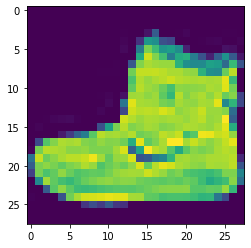

In [31]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full, X_test = X_train_full/255, X_test/255
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.imshow(X_train_full[0])
print(y_train_full)

In [32]:
print(tf.random.uniform([1])) 

tf.Tensor([0.68789124], shape=(1,), dtype=float32)


In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation=activation, kernel_initializer=initializer, kernel_regularizer=regularizer))
model.add(keras.layers.Dense(100, activation=activation, kernel_initializer=initializer, kernel_regularizer=regularizer))
model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer=initializer, kernel_regularizer=regularizer))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

In [35]:
history = model.fit(X_train_full, y_train_full, epochs=4, batch_size=128)

Epoch 1/4
469/469 [==============================] - 3s 5ms/step - loss: 1.0586 - accuracy: 0.6798
Epoch 2/4
469/469 [==============================] - 2s 4ms/step - loss: 0.6342 - accuracy: 0.7908
Epoch 3/4
469/469 [==============================] - 2s 4ms/step - loss: 0.5516 - accuracy: 0.8145
Epoch 4/4
469/469 [==============================] - 2s 4ms/step - loss: 0.5103 - accuracy: 0.8264


In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5286 - accuracy: 0.8119


[0.5286279320716858, 0.8119000196456909]

In [37]:
def doedingen(Activation, Initializer, Regularizer, Optimizer):
  random.seed(42)
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[28, 28]))
  model.add(keras.layers.Dense(300, activation=Activation, kernel_initializer=Initializer, kernel_regularizer=Regularizer))
  model.add(keras.layers.Dense(100, activation=Activation, kernel_initializer=Initializer, kernel_regularizer=Regularizer))
  model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer=Initializer, kernel_regularizer=Regularizer))
  model.summary()
  model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Optimizer,
    metrics=["accuracy"]
  )
  history = model.fit(X_train_full, y_train_full, epochs=4, batch_size=128)
  model.evaluate(X_test, y_test)
  return round(model.evaluate(X_test, y_test)[1], 4) 



Making a dictionary with the accuracy results of different parameters:

In [ ]:
answers = {}

params = [initializers, activations, optimizers, regularizers]
paramnames = ["initializers", "activations", "optimizers", "regularizers"]
for i in range(len(params)):
  answers[paramnames[i]] = []
  Initializer = params[0][0]
  Activation = params[1][0]
  Optimizer = params[2][0]
  Regularizer = params[3][0]
  PARA = [Initializer, Activation, Optimizer, Regularizer]
  for j in range(len(params[i])):
    PARA[i] = params[i][j]
    ans = doedingen(PARA[1], PARA[0], PARA[3], PARA[2])
    answers[paramnames[i]].append(str(params[i][j])+" "+str(ans))


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 784)               0         
                                                                 
 dense_63 (Dense)            (None, 300)               235500    
                                                                 
 dense_64 (Dense)            (None, 100)               30100     
                                                                 
 dense_65 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
469/469 [==============================] - 3s 6ms/step - loss: 1.0586 - accuracy: 0.6798
Epoch 2/4
469/469 [==============================] - 3s 6ms/step - loss: 0.6342 

In [40]:
for i in answers:
    print(i)
    for j in answers[i]:
      print("\t", j)

initializers
	 glorot_uniform 0.8119
	 <keras.initializers.initializers_v2.RandomNormal object at 0x7f098c3625b0> 0.782
	 <keras.initializers.initializers_v2.RandomUniform object at 0x7f098c3623d0> 0.724
	 <keras.initializers.initializers_v2.TruncatedNormal object at 0x7f098c3621c0> 0.7748
	 <keras.initializers.initializers_v2.Zeros object at 0x7f098c362130> 0.1
activations
	 relu 0.8119
	 softmax 0.1
	 sigmoid 0.629
	 tanh 0.8224
	 linear 0.8217
optimizers
	 sgd 0.8119
	 rmsprop 0.86
	 adam 0.8684
	 adadelta 0.6264
regularizers
	 None 0.8119
	 <keras.regularizers.L1 object at 0x7f098c52ecd0> 0.4767
	 <keras.regularizers.L2 object at 0x7f098c4f33a0> 0.7978
